In [1]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from tensorflow import keras
from keras import layers,models
from keras.layers import Dropout
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
x_list = []
y_list = []
x_train = []
y_train = []
x_valid = []
y_valid = []
#test good=> 100 + 2177/5 ,bad=> 12 + 239/3
dir_path = r'D:\\VSCode_files\\Coffee_project\\coffee\\archive\\bite_train_and_test'
img_filenames = os.listdir(dir_path) 

for img_filename in img_filenames:
    img_nparray = np.array(Image.open(f'{dir_path}\\{img_filename}'))
    for i in range(3):
        #img_nparray[i] = preprocessing.normalize(img_nparray[i],norm='l1')
        img_nparray[i] = preprocessing.scale(img_nparray[i])
        
    x_list.append(img_nparray)
    
    if img_filename[0]=='g':
        y_list.append(0)
    else:
        if img_filename[1]=='2':
            y_list.append(2)
        if img_filename[1]=='1':
            y_list.append(1)

y_list = keras.utils.to_categorical(y_list, num_classes=3)
x_train, x_valid, y_train, y_valid = train_test_split(x_list, y_list, random_state=20, stratify=y_list)
# print(np.array(x_train))


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224,224,3))) #kernel_regularizer=tf.keras.regularizers.l1(0.01)
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(16, kernel_size=(5, 5),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dense (Dense)               (None, 120)               5

Epoch 1/10
31/31 [==============================] - 12s 375ms/step - loss: 110.3144 - accuracy: 0.5263 - val_loss: 0.7563 - val_accuracy: 0.8086
Epoch 2/10
31/31 [==============================] - 12s 378ms/step - loss: 0.5201 - accuracy: 0.8689 - val_loss: 0.8210 - val_accuracy: 0.8179
Epoch 3/10
31/31 [==============================] - 12s 395ms/step - loss: 0.1189 - accuracy: 0.9556 - val_loss: 0.3958 - val_accuracy: 0.8796
Epoch 4/10
31/31 [==============================] - 15s 485ms/step - loss: 0.0198 - accuracy: 0.9928 - val_loss: 0.3140 - val_accuracy: 0.9167
Epoch 5/10
31/31 [==============================] - 17s 541ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.2609 - val_accuracy: 0.9290
Epoch 6/10
31/31 [==============================] - 17s 539ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2664 - val_accuracy: 0.9290
Epoch 7/10
31/31 [==============================] - 16s 525ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2686 - val_accuracy: 0.92

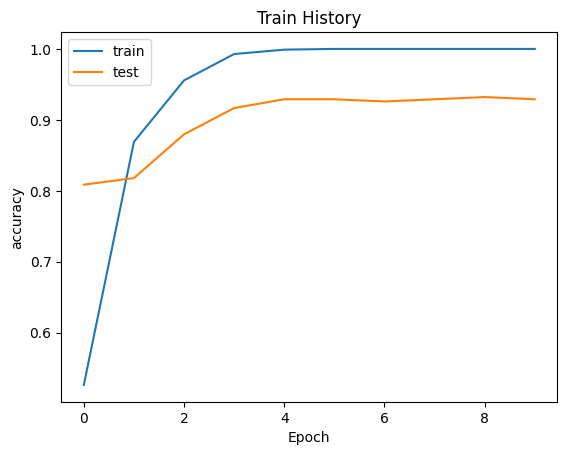

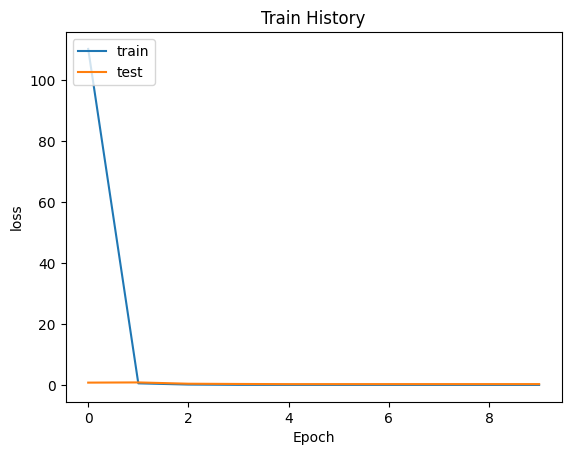

In [4]:
train_history = model.fit(np.array(x_train), np.array(y_train), batch_size=32, epochs=10, verbose=1, validation_data=(np.array(x_valid), np.array(y_valid)))
 
loss, accuracy = model.evaluate(np.array(x_valid), np.array(y_valid), verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')


In [5]:
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import confusion_matrix,classification_report

classify_type = 3
folderPath = r'D:\VSCode_files\Coffee_project\coffee\archive\bite_val'
filenames = os.listdir(folderPath)

ans_y = []
pred_y = []
for img_filename in filenames:
    img_array = np.expand_dims(np.array(Image.open(f'{folderPath}\\{img_filename}')),axis=0)
    
    if img_filename[0]=='g':
        ans_y.append(0)
    elif img_filename[1]=='2':
        ans_y.append(2)
    elif img_filename[1]=='1':
        ans_y.append(1)

    pred_res = model.predict(img_array, verbose=0)[0]
    for i in range(classify_type):
        if(pred_res[i] == max(pred_res)):
            pred_y.append(i)

print(ans_y)
print(pred_y)

print("confusion_matrix:\n",confusion_matrix(ans_y, pred_y))
print(classification_report(ans_y,pred_y))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
confusion_matrix:
 [[73  0  0]
 [13 21  1]
 [ 3  0 32]]
              precision    recall  f1-score   support

           0       0.82      

In [6]:
#model.save('bite.h5')